In [ ]:
!pip install catboost
!pip install matplotlibe
!pip install scikit-learn


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('cleardata.csv')

In [5]:
# Удаление столбца client_id
data = data.drop('client_id', axis=1)

In [4]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('target', axis=1)
y = data['target']

In [6]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Построение модели Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [9]:
# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       960
           1       0.81      0.33      0.46        40

    accuracy                           0.97      1000
   macro avg       0.89      0.66      0.72      1000
weighted avg       0.97      0.97      0.96      1000

ROC AUC: 0.9043359374999999


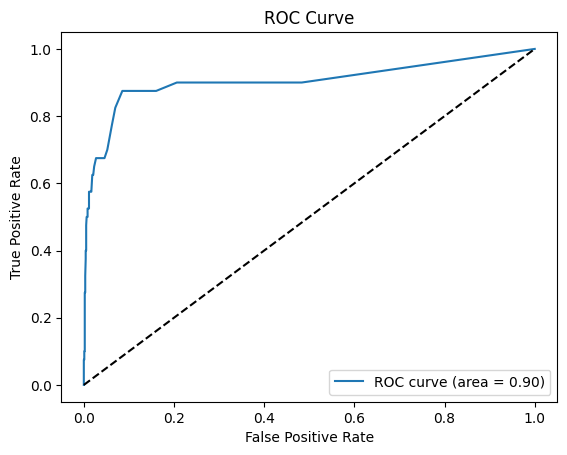

In [10]:
# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

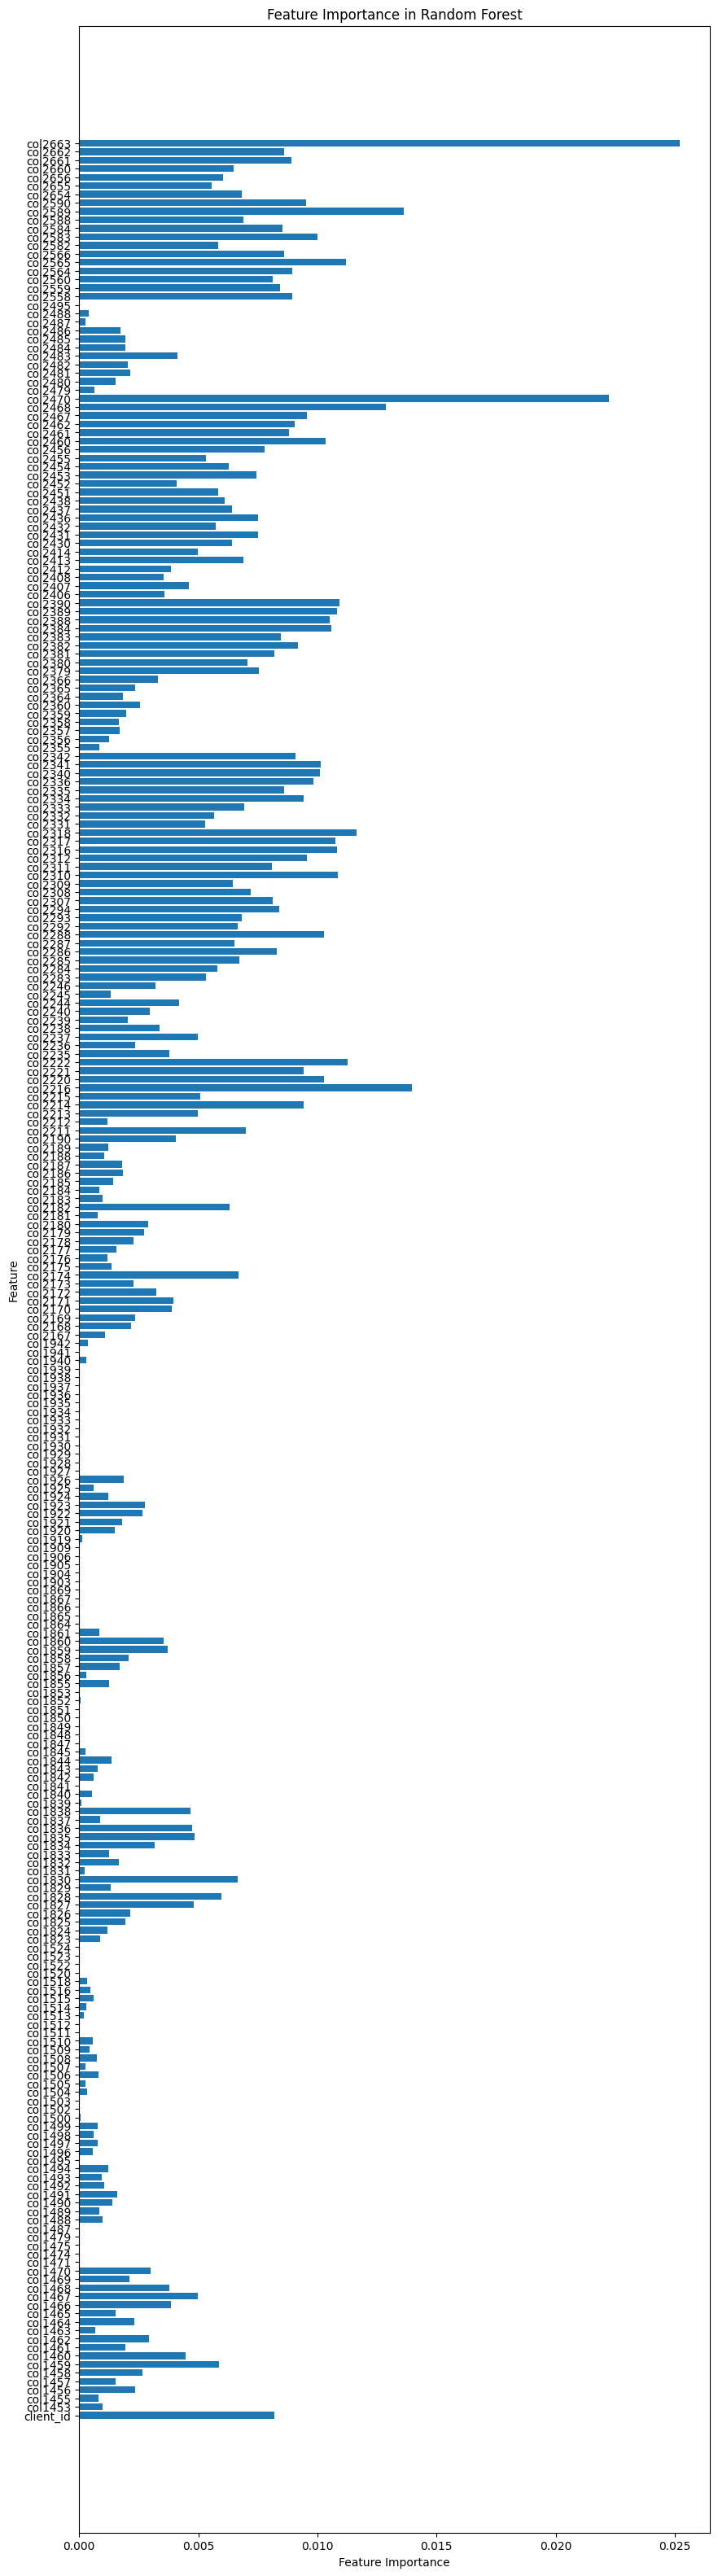

In [11]:
# Визуализация важности признаков
feature_importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 40))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()